Getting ready

This data set was provided by sex toys shop Sexy Elephant.

Sexy Elephant commissioned an oral-sex-focused questionnaire survey on a representative sample (n=1100) of the Czech's online population in the age range 18-65. The survey was conducted by an international market research agency.

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('oral_sex_eng_translation.csv')

The Dataset itself

In [25]:
data

,Form ID,Age,Sex,Admin region,Historical region,Resident population,Education,Do you engage in oral sex?,Kind of sex and eye contact
0,1,26,Female,Hradec Kralove,Bohemia,1 001 to 5 000,Elementary,Yes – mostly because I initiated it,Vaginal sex – eye contact is not important
1,2,29,Male,Pardubice,Bohemia,20 001 to 100 000,Apprenticeship,Yes – because we both equally wanted to,Oral sex – eye contact is not important
2,3,63,Male,Prague,Prague,100 001 and above,Apprenticeship,Yes – because we both equally wanted to,Vaginal sex – eye contact is not important
3,4,32,Male,Prague,Prague,100 001 and above,Secondary,Yes – mostly because I initiated it,Vaginal sex – eye contact is important
4,5,33,Female,Pardubice,Bohemia,1 001 to 5 000,Apprenticeship,Yes – because we both equally wanted to,Anal sex – eye contact is important
...,...,...,...,...,...,...,...,...,...
1095,1096,56,Female,Zlin,Moravia,20 001 to 100 000,Apprenticeship,Yes – mostly because my partner initiated it,Vaginal sex – eye contact is not important
1096,1097,35,Female,Central Bohemian,Bohemia,5 001 to 20 000,Secondary,No – although I had a vaginal/anal sex,Vaginal sex – eye contact is not important
1097,1098,28,Male,Central Bohemian,Bohemia,Up to 1 000,Apprenticeship,Yes – because we both equally wanted to,Oral sex – eye contact is not important
1098,1099,28,Female,Zlin,Moravia,Up to 1 000,Apprenticeship,Yes – mostly because my partner initiated it,Vaginal sex – eye contact is important


Average age for oral sex

In [26]:
print(data["Age"].mean())

42.45


Data description

In [27]:
data.describe()

,Form ID,Age
count,1100.000000,1100.000000
mean,550.500000,42.450000
std,317.686953,13.318327
min,1.000000,18.000000
25%,275.750000,31.000000
50%,550.500000,43.000000
75%,825.250000,54.000000
max,1100.000000,65.000000


In [28]:
categories = [col for col in data.columns if data[col].dtype=='O']
categories

['Sex',
 'Admin region',
 'Historical region',
 'Resident population',
 'Education',
 'Do you engage in oral sex?',
 'Kind of sex and eye contact']

In [29]:
uqique_categories_values={}
for colm in categories:
    uqique_categories_values[colm] = data[colm].unique()

uqique_categories_values

{'Sex': array(['Female', 'Male'], dtype=object),
 'Admin region': array(['Hradec Kralove', 'Pardubice', 'Prague', 'South Moravian',
        'Central Bohemian', 'Usti nad Labem', 'Vysocina',
        'Moravian-Silesian', 'Zlin', 'Plzen', 'South Bohemian', 'Liberec',
        'Karlovy Vary', 'Olomouc'], dtype=object),
 'Historical region': array(['Bohemia', 'Prague', 'Moravia'], dtype=object),
 'Resident population': array(['1 001 to 5 000', '20 001 to 100 000', '100 001 and above',
        '5 001 to 20 000', 'Up to 1 000'], dtype=object),
 'Education': array(['Elementary', 'Apprenticeship', 'Secondary', 'University'],
       dtype=object),
 'Do you engage in oral sex?': array(['Yes – mostly because I initiated it',
        'Yes – because we both equally wanted to',
        'No – and I had no vaginal/anal sex',
        'No – although I had a vaginal/anal sex',
        'Yes – mostly because my partner initiated it',
        'I don’t know/remember'], dtype=object),
 'Kind of sex and eye cont

Pretty clean, don't you think?

In [30]:
data.isnull().values.any()

False

In [31]:
data.isnull().sum().sum()

0

Plots

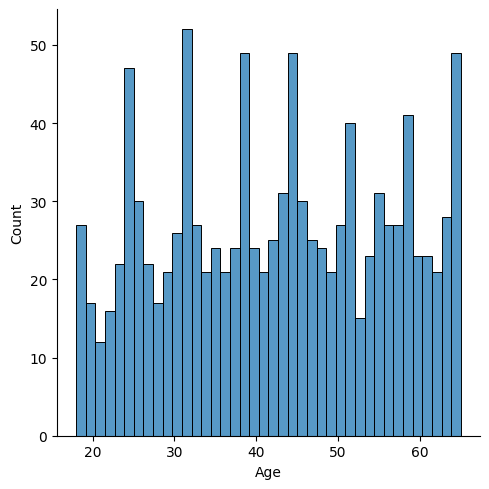

In [42]:
sns.displot(data['Age'], bins=40)
plt.show()

Age is not normally distributed

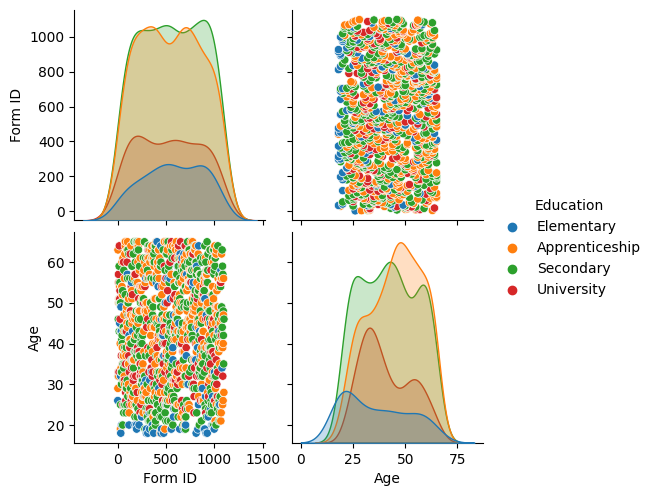

In [33]:
sns.pairplot(data, hue='Education')

In [58]:
dr = data["Age"].unique().sort()
dr

In [61]:
#data = pd.DataFrame(data.Age.unique(), data["Age"].unique().value_counts(normalize=True) * 100, columns = ['Unique Age', "Percentage"])
fig = px.pie(data, values = data["Age"].value_counts(), names = data["Age"].unique(), title = "Age in percentage")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [80]:
def OverviewPlots(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    data = data[[col for col in data if nunique[col] > 1 and nunique[col] < 60]]
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(figsize = (5 * nGraphPerRow, 7 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columndata = data.iloc[:, i]
        valueCounts = columndata.value_counts()
        valueCounts.plot.bar()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.show()

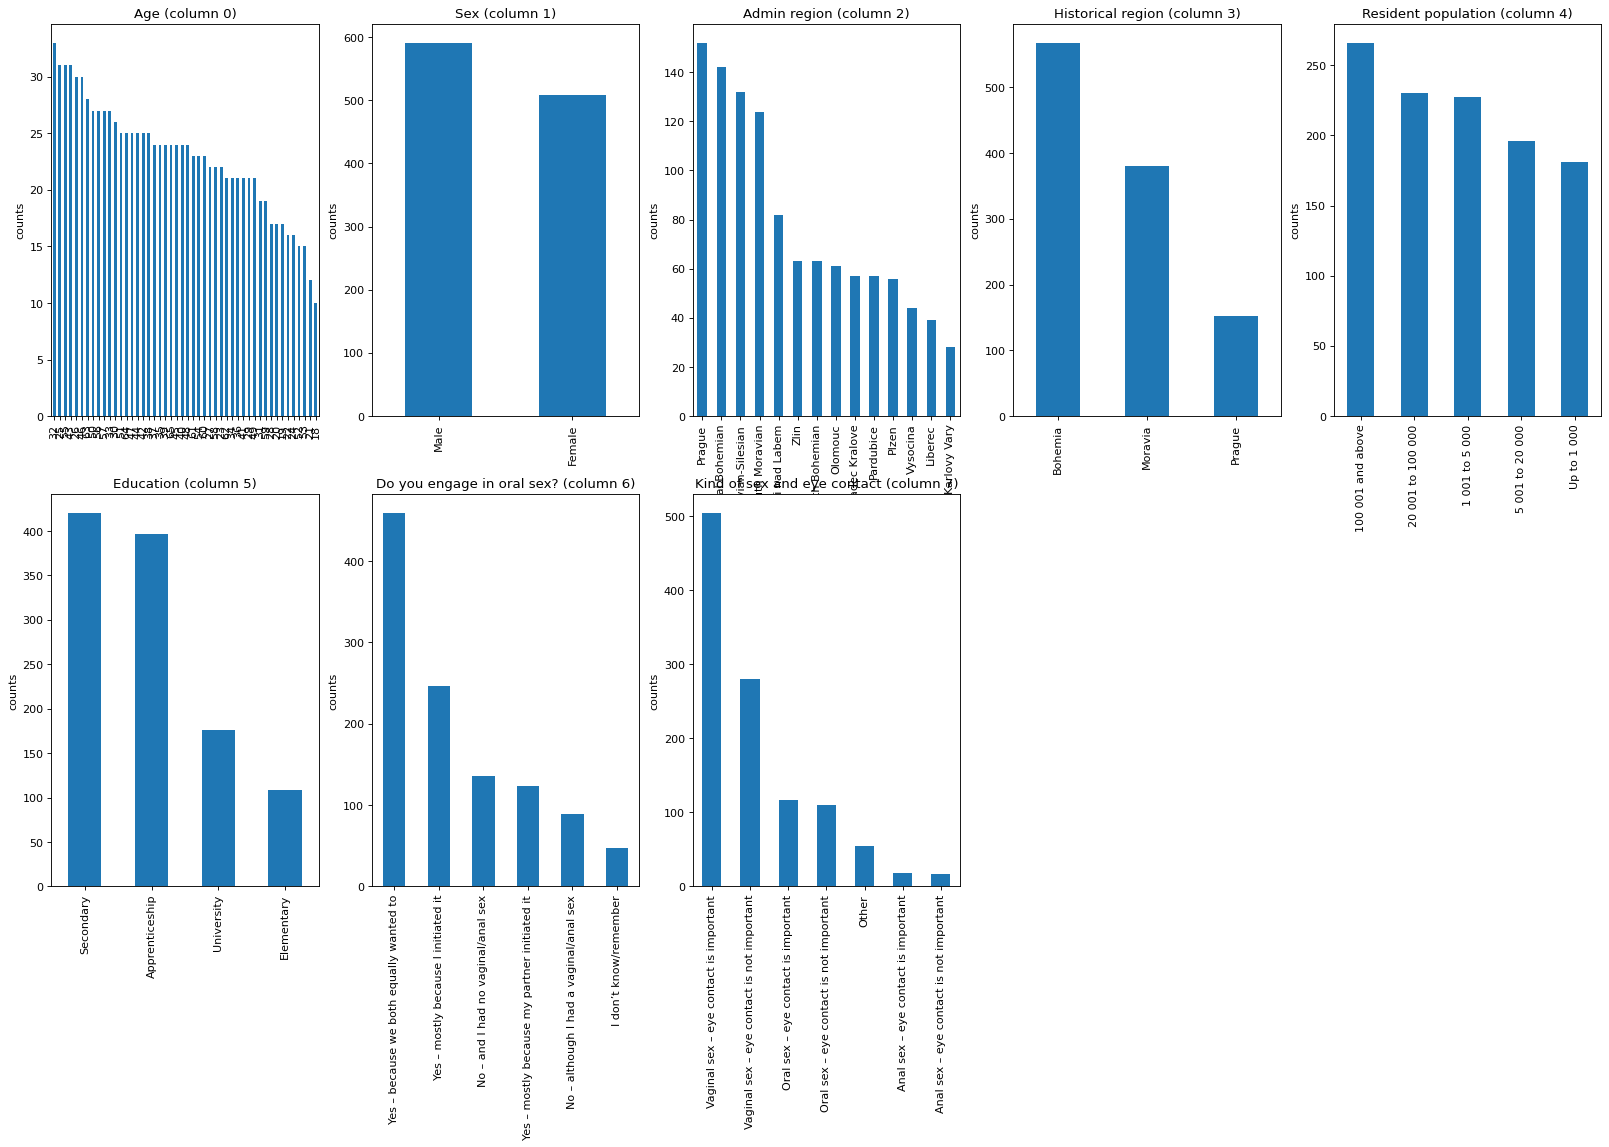

In [81]:
OverviewPlots(data, 10, 5)

In [ ]:
for colm in categories:
    plt.figure(figsize=(12,4))
    sns.countplot(data[colm],order=data[colm].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

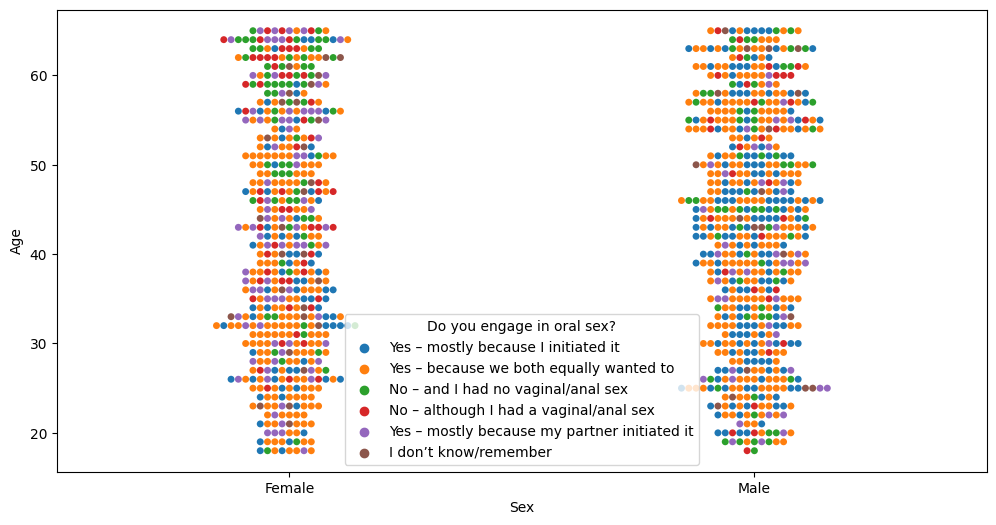

In [38]:
plt.figure(figsize=(12,6))
sns.swarmplot(y=data['Age'],x=data['Sex'],hue=data['Do you engage in oral sex?'])
plt.show()

In [39]:
data_men = data.loc[data['Sex'] == 'Male']
x = data_men['Kind of sex and eye contact']

data_women = data.loc[data['Sex'] == 'Female']
y = data_women['Kind of sex and eye contact']

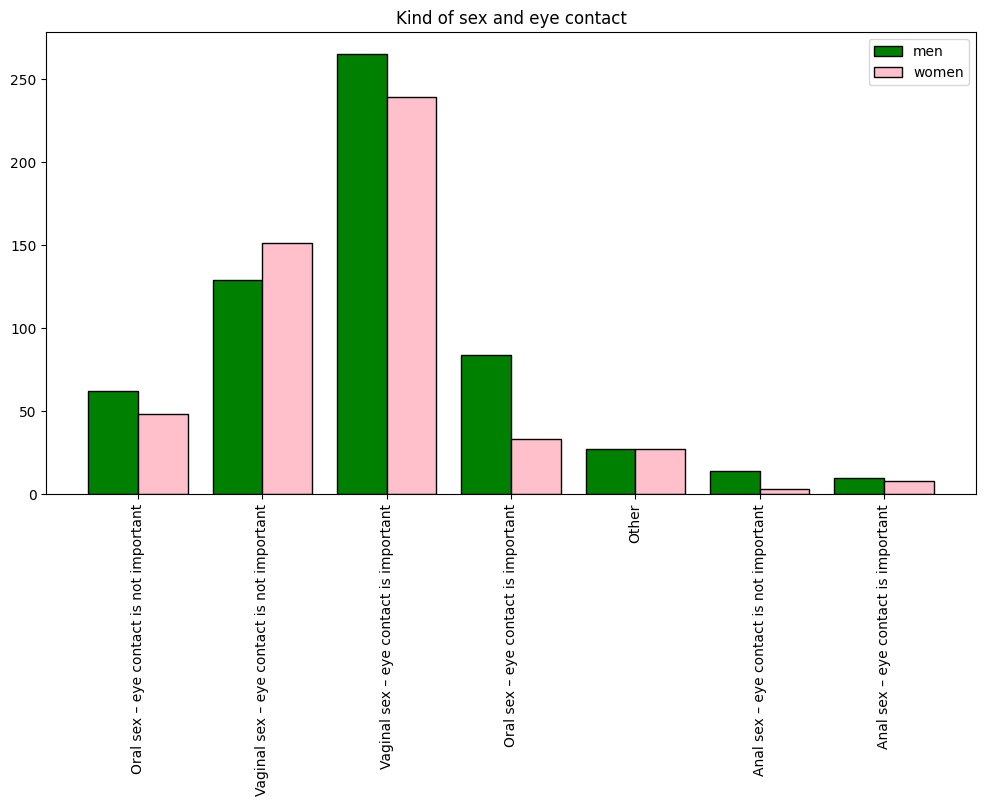

In [41]:
plt.figure(figsize=(12,6))
plt.hist(x, bins=np.arange(8)-0.7, rwidth=0.4, color='green', label='men', ec='black')
plt.hist(y, bins=np.arange(8)-0.3, rwidth=0.4, color='pink', label='women', ec='black')
plt.legend()
plt.title('Kind of sex and eye contact')
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Oral sex – eye contact is not important'),
  Text(1, 0, 'Vaginal sex – eye contact is not important'),
  Text(2, 0, 'Vaginal sex – eye contact is important'),
  Text(3, 0, 'Oral sex – eye contact is important'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Anal sex – eye contact is not important'),
  Text(6, 0, 'Anal sex – eye contact is important')])

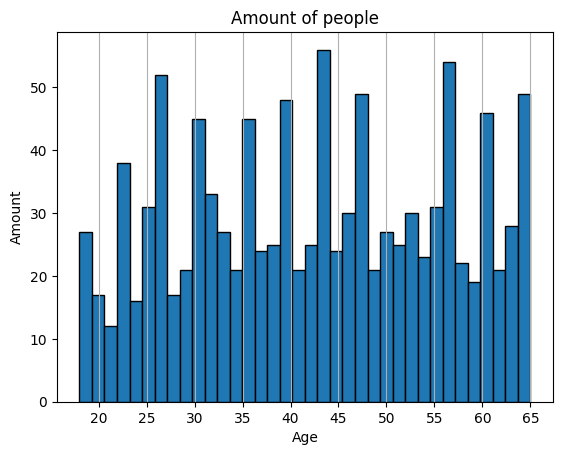

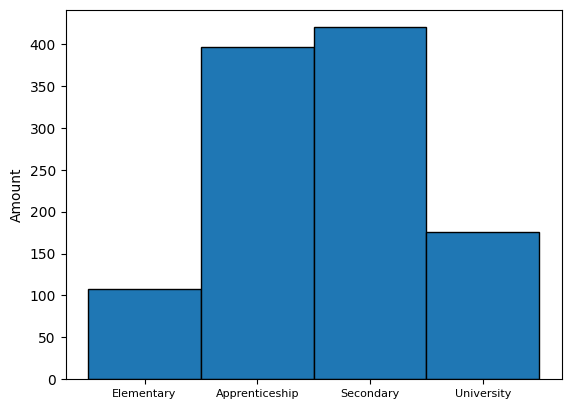

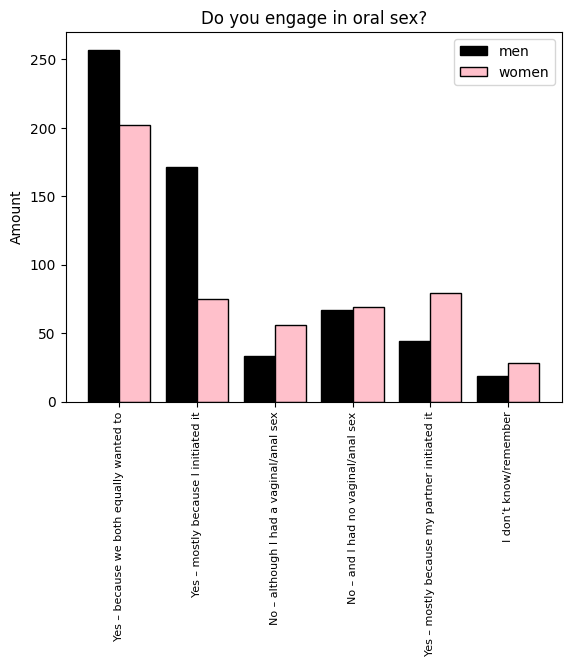

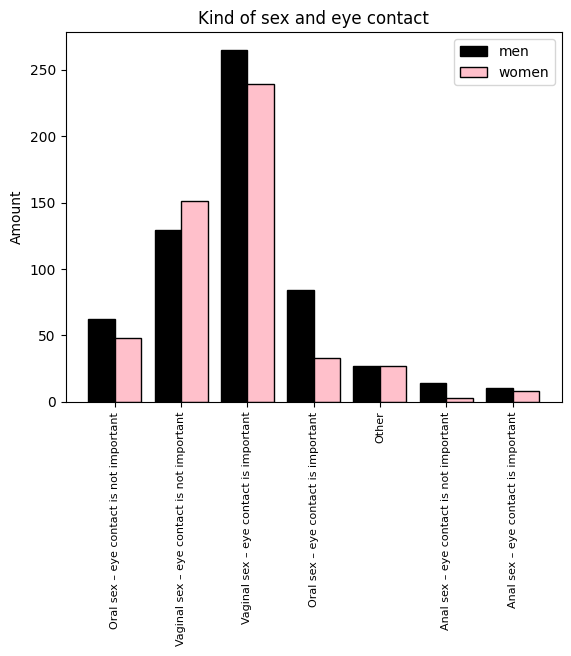

In [88]:
plot1 = plt.figure(1)
x = data['Age']
plt.grid(axis='x')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Amount of people')
plt.xticks(np.arange(10, 70, 5))

hist_plot = plt.hist(x, bins = 36, ec='black')

plot1 = plt.figure(4)
x = data['Education']
hist_plot = plt.hist(x, bins=np.arange(5)-0.5, ec='black')
plt.ylabel('Amount')
plt.xticks(size = 8, rotation=0)

plot1 = plt.figure(5)
data_men = data.loc[data['Sex'] == 'Male']
x = data_men['Do you engage in oral sex?']

data_women = data.loc[data['Sex'] == 'Female']
y = data_women['Do you engage in oral sex?']

plt.hist(x, bins=np.arange(7)-0.7, rwidth=0.4, color='black', label='men', ec='black')
plt.hist(y, bins=np.arange(7)-0.3, rwidth=0.4, color='pink', label='women', ec='black')

plt.legend(loc='upper right')
plt.title('Do you engage in oral sex?')
plt.ylabel('Amount')
plt.xticks(size = 8, rotation=90)


plot1 = plt.figure(6)
data_men = data.loc[data['Sex'] == 'Male']
x = data_men['Kind of sex and eye contact']

data_women = data.loc[data['Sex'] == 'Female']
y = data_women['Kind of sex and eye contact']

plt.hist(x, bins=np.arange(8)-0.7, rwidth=0.4, color='black', label='men', ec='black')
plt.hist(y, bins=np.arange(8)-0.3, rwidth=0.4, color='pink', label='women', ec='black')

plt.legend(loc='upper right')
plt.title('Kind of sex and eye contact')
plt.ylabel('Amount')
plt.xticks(size = 8, rotation=90)

So, as an overview, I can say, that when the mutual agreement occur, it is more likely that both genders wii agree to have oral sex. Moreover, eye contact plays a great role in sex, and especially in vaginal sex. The most